In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.evaluate import bias_variance_decomp
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix


from tqdm import tqdm

In [ ]:
df = pd.read_excel('sem_4.xls')

### 1. Предварительный анализ данных

#### Пропуски

Убедимся в том, что нет пропусков. В результате - их нет.

In [ ]:
df.isna().sum()

target       0
age          0
educ         0
work_exp     0
interest     0
coffee       0
boss_educ    0
passport     0
green        0
floor        0
children     0
climate      0
offhour      0
dist         0
salary       0
heigh        0
lunch        0
dtype: int64

#### Тип данных в столбцах

In [ ]:
df.dtypes

target         int64
age            int64
educ           int64
work_exp       int64
interest       int64
coffee       float64
boss_educ      int64
passport       int64
green          int64
floor          int64
children       int64
climate        int64
offhour        int64
dist         float64
salary         int64
heigh          int64
lunch          int64
dtype: object

### 2. Отбор признаков

Посмотрим на корреляционную матрицу просто для общего впечатления.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

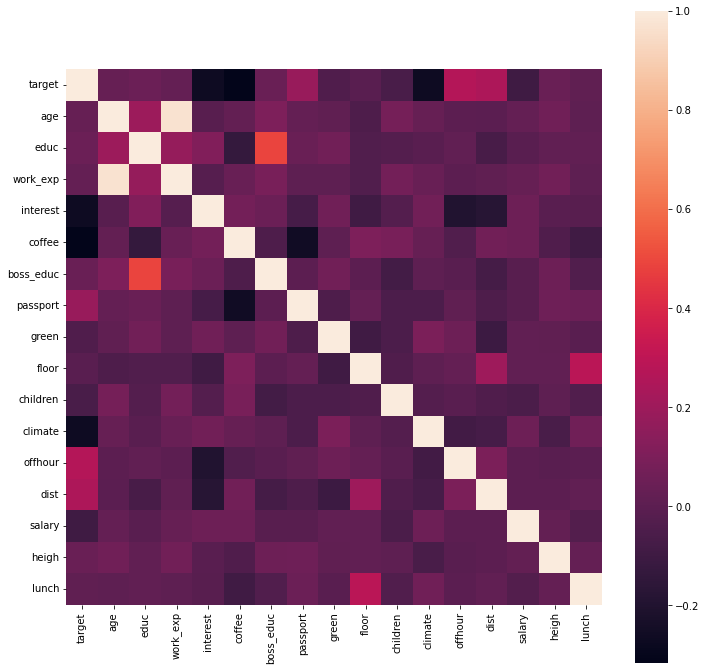

In [ ]:
corrmat = df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corrmat, square=True)
plt.show()

In [ ]:
corrmat

,target,age,educ,work_exp,interest,coffee,boss_educ,passport,green,floor,children,climate,offhour,dist,salary,heigh,lunch
target,1.000000,0.030904,0.046247,0.024676,-0.266240,-0.316441,0.042071,0.185342,-0.040751,-0.011566,-0.061014,-0.267805,0.266213,0.245826,-0.099234,0.038524,0.009652
age,0.030904,1.000000,0.193965,0.966593,-0.018100,0.022193,0.100664,0.027025,0.011081,-0.048146,0.079317,0.032328,0.001648,-0.007591,0.025933,0.061677,0.003041
educ,0.046247,0.193965,1.000000,0.172928,0.111074,-0.135974,0.488038,0.042000,0.065762,-0.036958,-0.026367,-0.008393,0.013761,-0.065000,-0.008323,0.017131,0.016025
work_exp,0.024676,0.966593,0.172928,1.000000,-0.018489,0.034827,0.085922,0.005739,0.003019,-0.036442,0.071044,0.037314,-0.000113,0.012256,0.028183,0.069176,0.007424
interest,-0.266240,-0.018100,0.111074,-0.018489,1.000000,0.071774,0.047040,-0.072606,0.059619,-0.095220,-0.024070,0.066103,-0.198222,-0.179107,0.052766,-0.008052,-0.013930
coffee,-0.316441,0.022193,-0.135974,0.034827,0.071774,1.000000,-0.046351,-0.255269,0.004050,0.104948,0.087436,0.029701,-0.034376,0.065100,0.048929,-0.042351,-0.093563
boss_educ,0.042071,0.100664,0.488038,0.085922,0.047040,-0.046351,1.000000,-0.002639,0.066961,0.002158,-0.080723,0.005633,-0.009352,-0.076671,-0.013197,0.052343,-0.035486
passport,0.185342,0.027025,0.042000,0.005739,-0.072606,-0.255269,-0.002639,1.000000,-0.044844,0.025053,-0.052250,-0.052288,0.010004,-0.045631,-0.017975,0.054919,0.048082
green,-0.040751,0.011081,0.065762,0.003019,0.059619,0.004050,0.066961,-0.044844,1.000000,-0.091434,-0.049071,0.096890,0.051826,-0.107737,0.013901,0.009076,-0.011348
floor,-0.011566,-0.048146,-0.036958,-0.036442,-0.095220,0.104948,0.002158,0.025053,-0.091434,1.000000,-0.043882,0.004191,0.023086,0.199300,0.014560,0.015944,0.290174


Сначала мы подумали, что показатель заработной платы __salary__ важен и предварительно его выбрали, вдобавок мы выяснили, что человек часто не удовлетворен з/п и все равно продолжает работать, поэтому решили её не брать.

1) __interest__ - категориальная переменная, которая показывает интерес к работе, но мы решили, что мы её будем использовать как количественную, во-первых, во-вторых, это, по нашему мнению, самая важная переменная, потому чаще всего человек принимает такое решение, если его совсем не устраивает его работа
2) __offhour__ - наличие переработок, как мы думаем, очень сильно влияет на самочувствие человека, потому что часто они не оплачиваются, то есть ты работаешь больше просто так, поэтому думаешь о том, чтобы уволиться
3) __coffee__ - среднее количество чашек кофе, выпиваемых за рабочий день. Как мы думаем, человек пытается повысить продуктивность, то есть он пытается сделать все возможное, чтобы остаться в фокусе и продолжить работать, ему важно работать
4) __passport__ - наличие заграна, как мы думаем, это proxy для мобильности и подвижности, может, человек не очень привязывается к работе, потому что он открыт для новых возможностей
5) __climate__ - удволетворенность рабочей атмосферой, тоже очень важный показатель, который влияет на психологическое состояние на работе
6) __dist__ - расстояние до работы, что становится очень важным в некоторых ситуация, особенно с возрастом

Для выбранных переменных посмотрим на наличие выбросов (не для всех)

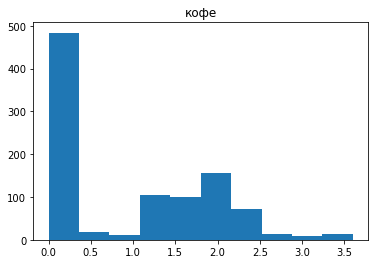

In [ ]:
plt.hist(df['coffee'])
plt.title('Количество выпитых чашек кофе')
plt.show()

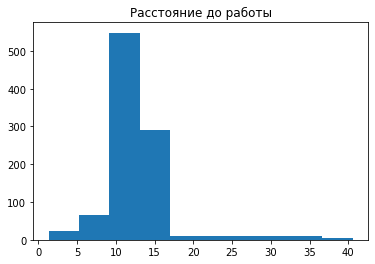

In [ ]:
plt.hist(df['dist'])
plt.title('Расстояние до работы')
plt.show()

### 3. Random Forest

а) с глубиной 2

In [ ]:
X = df[['interest', 'offhour', 'coffee', 'passport', 'dist', 'climate']]
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

rfc = RandomForestClassifier(max_depth = 2, random_state=42)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

#accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

#confusion matrix
print(f"Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.7128
Confusion matrix:
[[199   2]
 [ 83  12]]


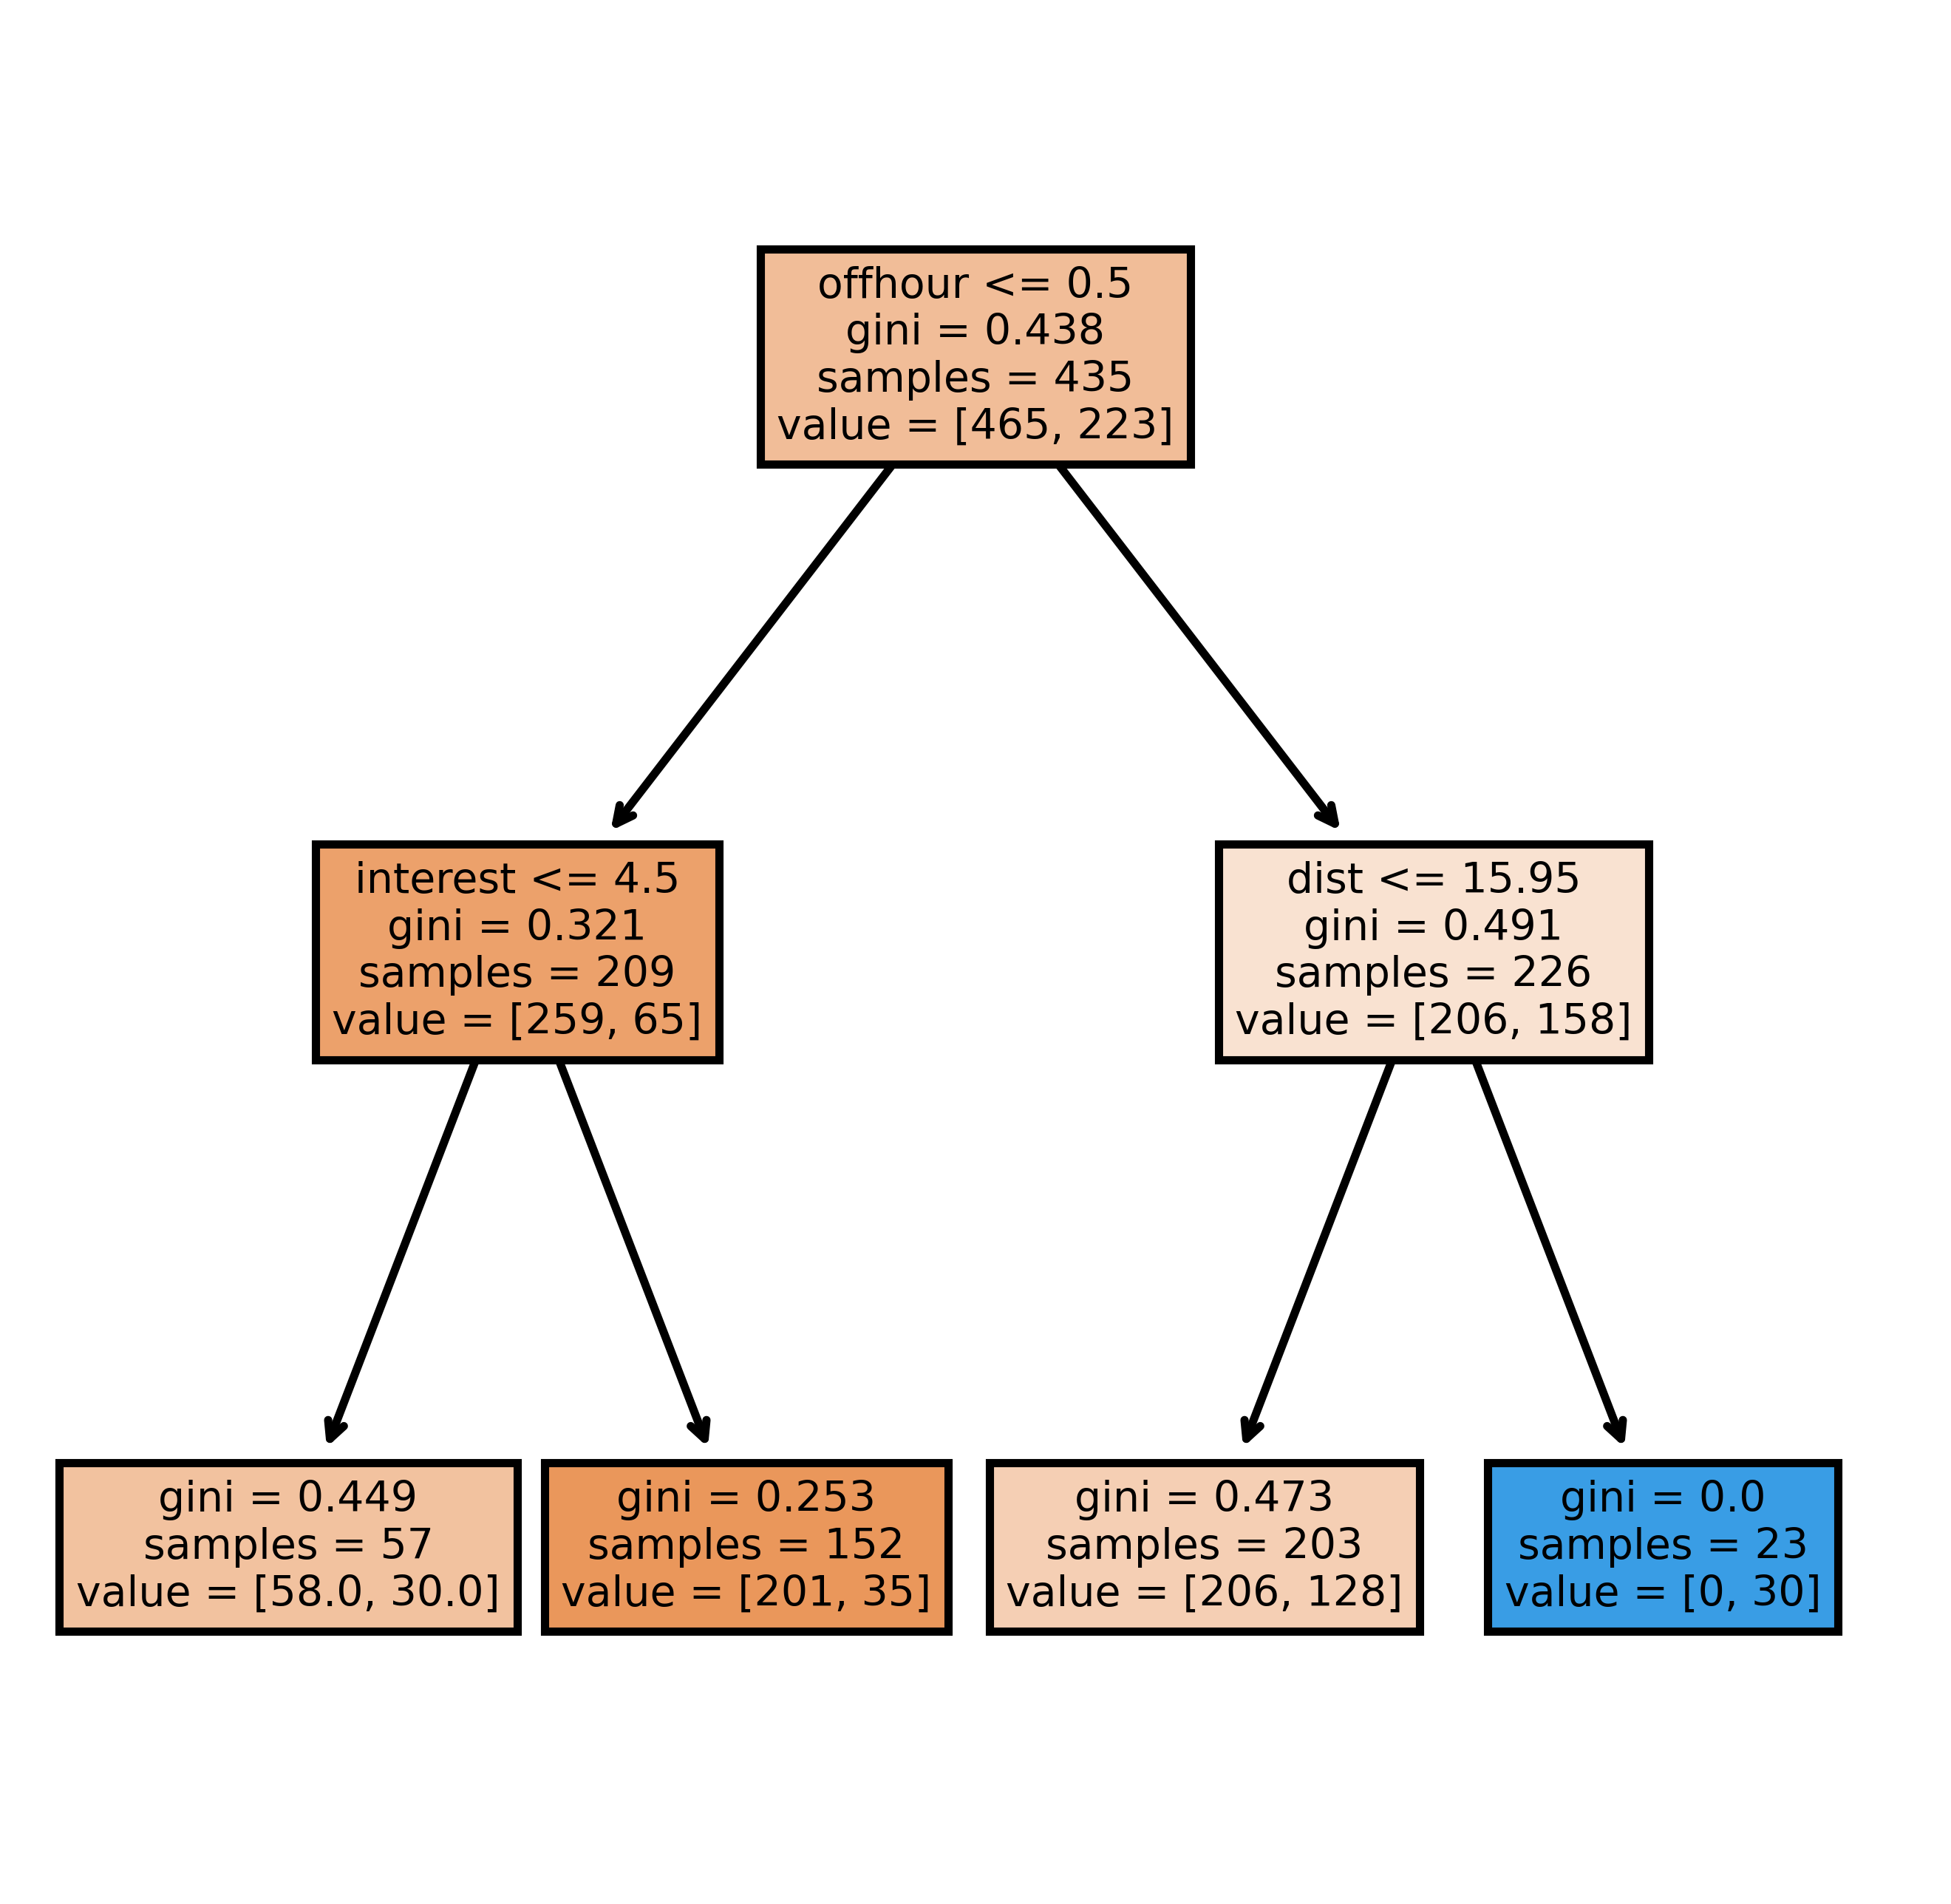

In [ ]:
# картинка 1 дерева
from sklearn import tree
fn = rfc.feature_names_in_
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0], feature_names = fn,
               filled = True);
fig.savefig('rf_individualtree.png')

Чем больше значение в скобках - тем важнее признак, у нас самый важный - расстояние до работы.

Feature ranking:
1. dist (0.266)
2. coffee (0.264)
3. interest (0.205)
4. climate (0.142)
5. offhour (0.090)
6. passport (0.033)


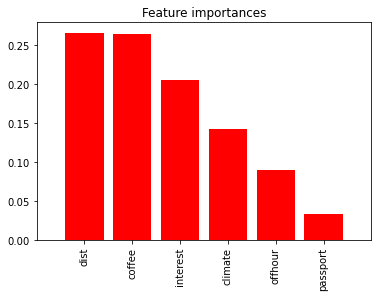

In [ ]:
importances = rfc.feature_importances_
feature_names = rfc.feature_names_in_
# сортировка
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]:.3f})")

# для графика
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

б) с глубиной 10

In [ ]:
rfc1 = RandomForestClassifier(max_depth = 10, random_state=42)

rfc1.fit(X_train, y_train)

y_pred = rfc1.predict(X_test)

#accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

#confusion matrix
print(f"Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.7635
Confusion matrix:
[[169  32]
 [ 38  57]]


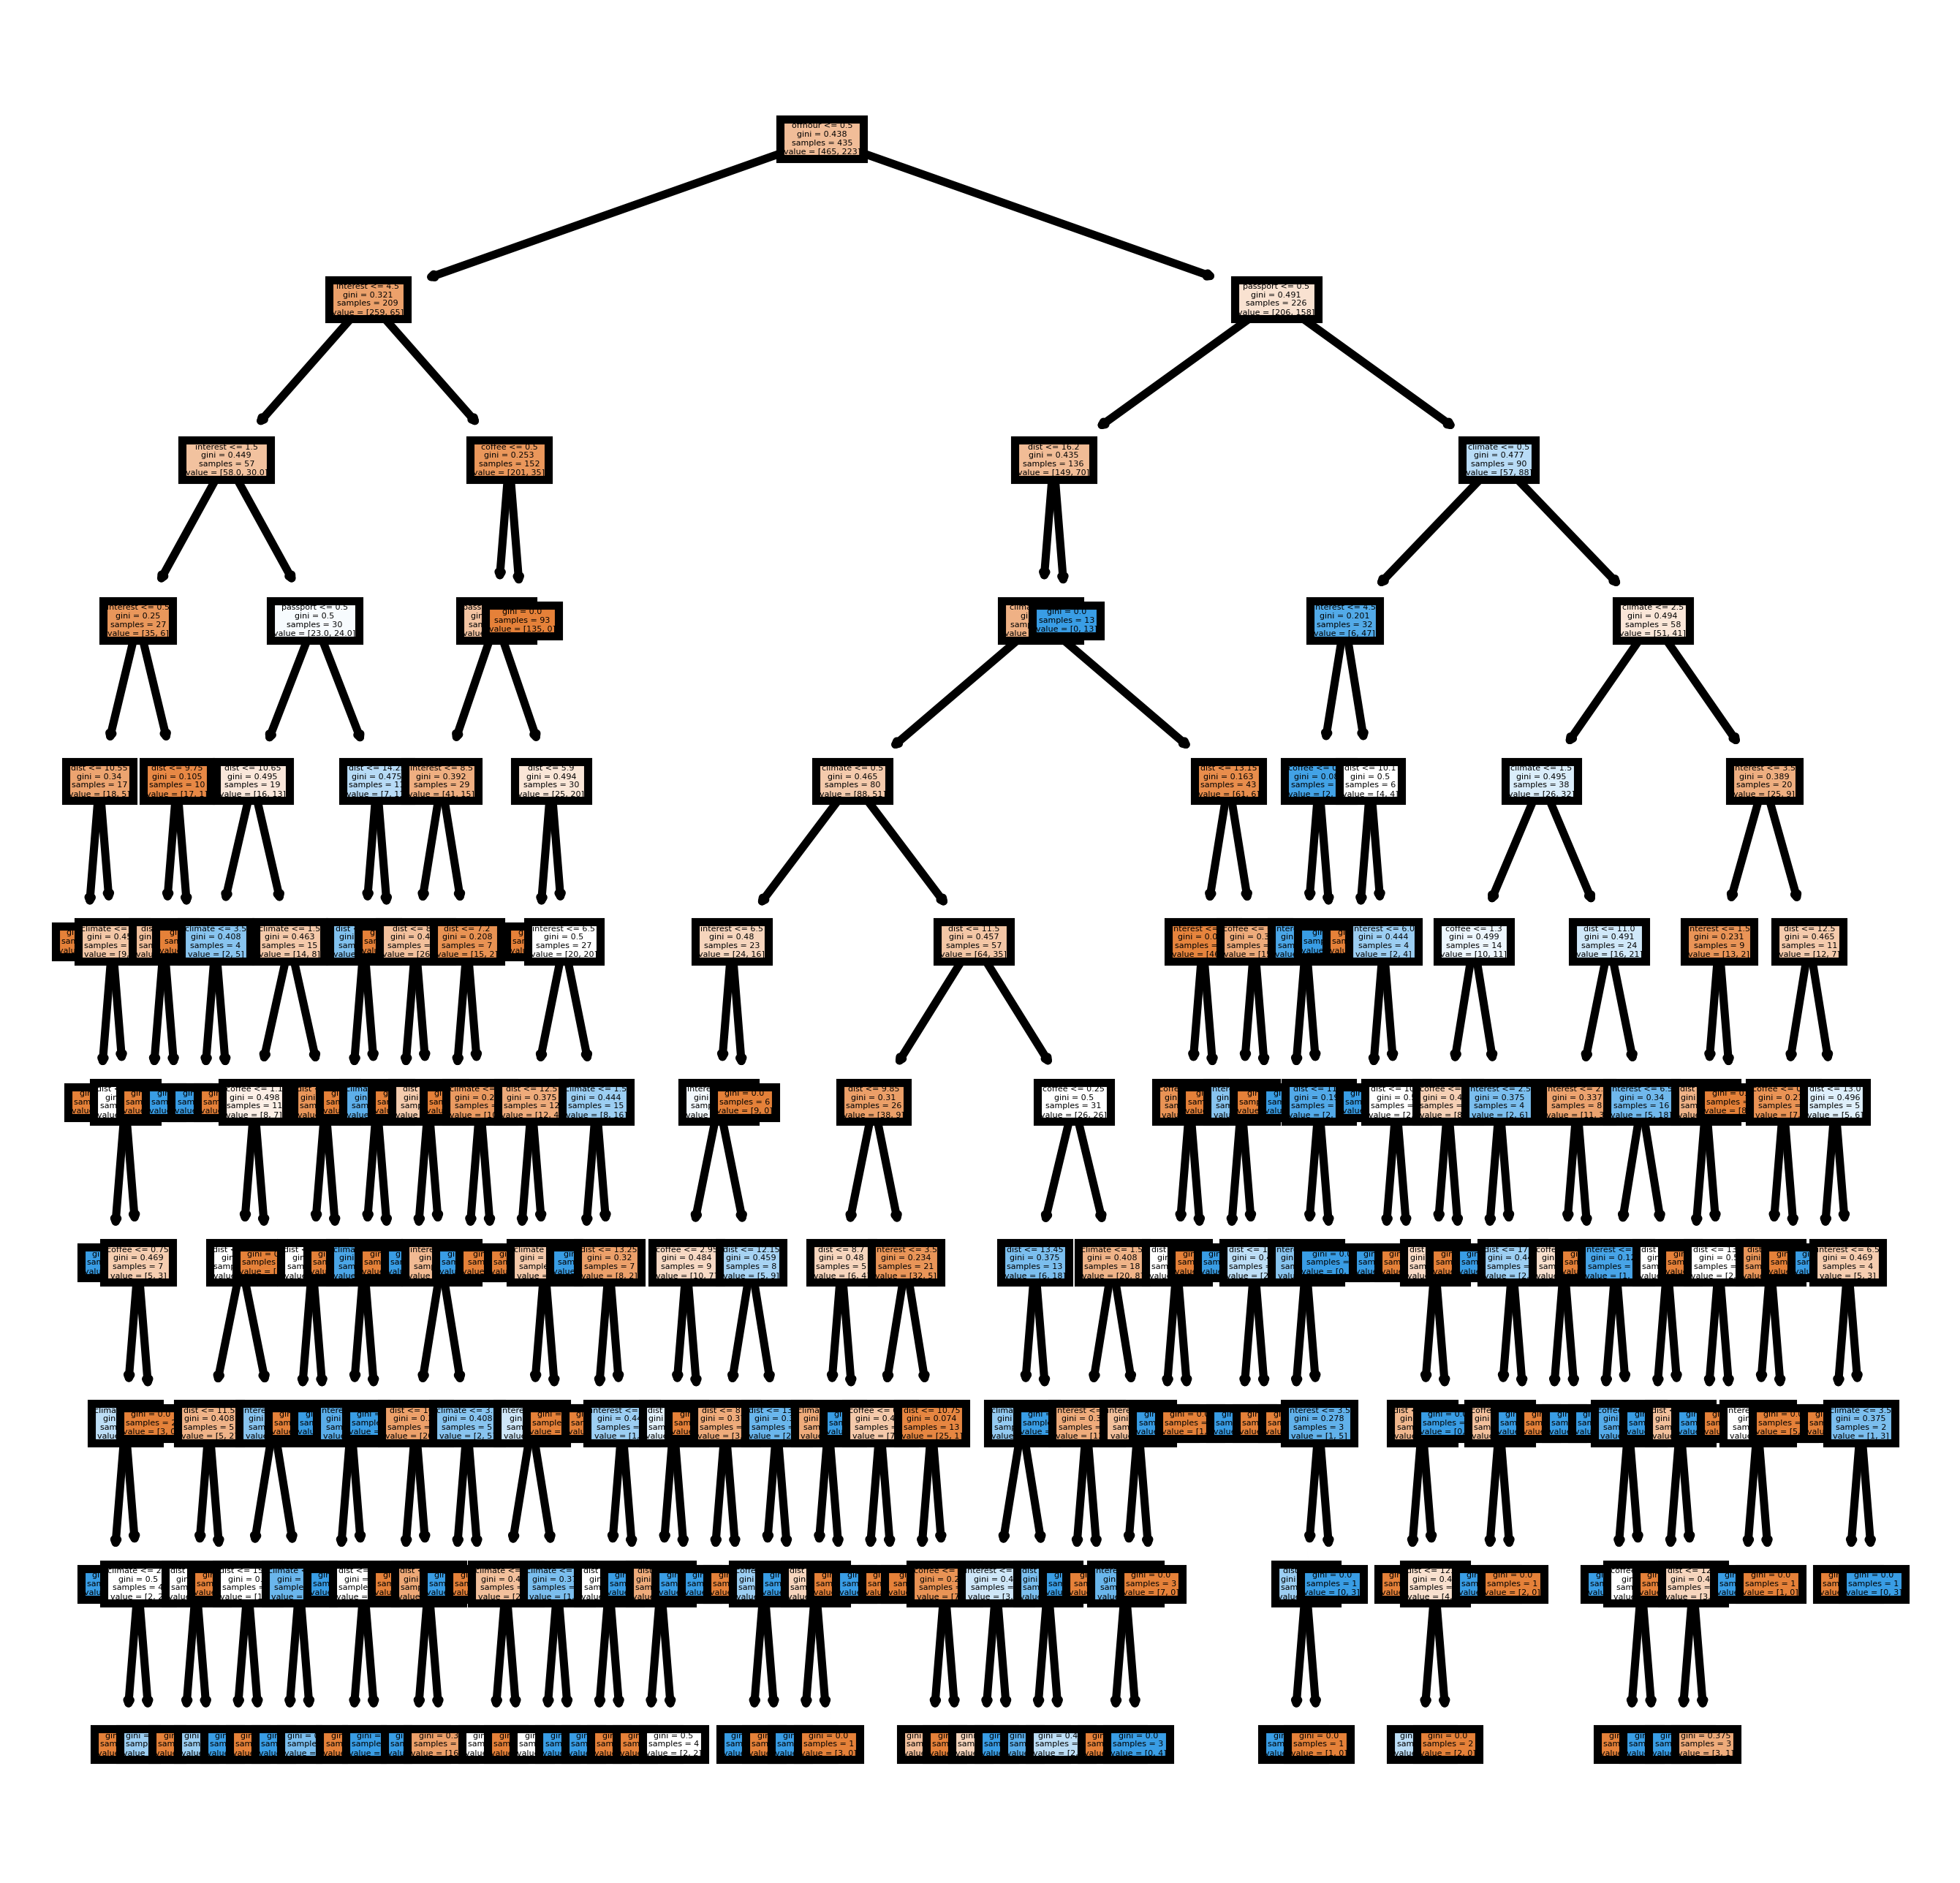

In [ ]:
# картинка 1 дерева
from sklearn import tree
fn = rfc1.feature_names_in_
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc1.estimators_[0], feature_names = fn,
               filled = True);
fig.savefig('rf_individualtree1.png')

Feature ranking:
1. dist (0.351)
2. coffee (0.202)
3. interest (0.201)
4. climate (0.144)
5. offhour (0.062)
6. passport (0.041)


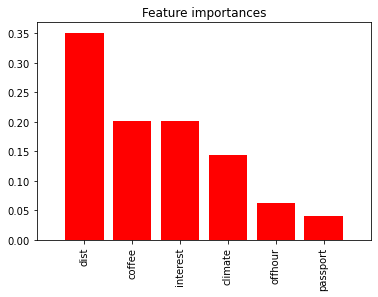

In [ ]:
importances = rfc1.feature_importances_
feature_names = rfc1.feature_names_in_
# сортировка
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]:.3f})")

# для графика
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Здесь мы тоже получили, что главным признаком является расстояние до работы.

### 4. Интерпретация и сравнения

В обоих случаях мы получили accuracy score > 0.7, что хорошо, у второго дерева вышло побольше.

Во втором случае мы стали хуже предсказывать те случаи, когда человек уволился на самом деле, а модель предсказала обратное (2 по сравнению с 32).

В обоих случаях самый важный признак - расстояние до работы, порядок признаков одинаков, но важность (score) - меняется, во втором случае, например, количество кофе становится менее важным.

Нам кажется, что признак расстояния самый важный, потому что ты едешь по фиолетовой ветке и думаешь "жесть, и оно того стоит...", это огромные издержки, потому что это потеря времени, нервов, с этим тяжелее всего смириться, по сравнению, например, с атмосферой на работе или удовлетворенностью работой.

### 5. Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

#accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

#confusion matrix
print(f"Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.7905
Confusion matrix:
[[172  29]
 [ 33  62]]


Feature ranking:
1. dist (0.391)
2. coffee (0.246)
3. interest (0.173)
4. climate (0.107)
5. offhour (0.068)
6. passport (0.016)


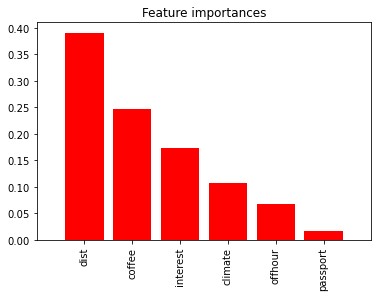

In [ ]:
importances = gbr.feature_importances_
feature_names = gbr.feature_names_in_
# сортировка
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]:.3f})")

# для графика
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

### 6. Обоснованный выбор наилучшей модели

Видно, что для __Boosting__:

- accuracy выше
- по confusion matrix лучше
- важность признаков (порядок) сохраняется, но это, в целом, не важно, с одной стороны, но, с другой стороны, что наша модель имеет смысл, потому что порядок устойчив

Вывод: бустинг - наилучшая модель.